<a href="https://colab.research.google.com/github/Taeye-Kwack/Mobile_Campaign/blob/main/process.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

(7889, 14)
(7889, 14)
[126.64       126.85802222 127.07604444 127.29406667 127.51208889
 127.73011111 127.94813333 128.16615556 128.38417778 128.6022    ]
DATE             0
TIME             0
CO2           1972
CAVITY_P         0
CAVITY_T         0
INDEX            0
VALID            0
LATITUDE         0
LONGITUDE        0
ALTITUDE         0
SPEED            0
HEADING          0
CarsNumber       0
Flag          7847
dtype: int64
493.7163900709225 1269
522.0565844155847 616
501.7958235294116 2142
491.3186821378332 711
470.7885122615804 367
478.6913396825394 315
464.293130548303 383
530.9631153846152 78
450.9681388888888 36


,DATE,TIME,CO2,CAVITY_P,CAVITY_T,INDEX,VALID,LATITUDE,LONGITUDE,ALTITUDE,SPEED,HEADING,CarsNumber,Flag
299,2020-09-11,10:37:33,432.877,40.0289,55.0010,300.0,SPS,37.394600,126.641518,-29.900000,6.093080,131.069086,4797,NaN
300,2020-09-11,10:37:34,430.020,40.0277,55.0010,301.0,SPS,37.394585,126.641540,0.000000,8.556240,122.184199,4797,NaN
301,2020-09-11,10:37:35,441.870,40.0281,55.0010,302.0,SPS,37.394572,126.641567,0.200000,9.463720,116.221788,4797,NaN
302,2020-09-11,10:37:36,481.482,40.0281,55.0010,303.0,SPS,37.394557,126.641605,0.700000,11.019400,115.521510,4797,NaN
303,2020-09-11,10:37:37,489.612,40.0289,55.0010,304.0,SPS,37.394538,126.641653,1.800000,12.871400,124.471994,4797,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11018,2020-09-11,14:39:08,NaN,40.4472,54.9995,11612.0,SPS,38.153530,128.586168,42.299999,73.876282,28.648250,775,NaN
11019,2020-09-11,14:39:09,NaN,40.4468,54.9995,11613.0,SPS,38.153688,128.586278,40.900002,73.005836,27.912613,775,NaN
11020,2020-09-11,14:39:10,NaN,40.4460,54.9995,11614.0,SPS,38.153847,128.586385,39.700001,73.357719,28.148749,775,NaN
11021,2020-09-11,14:39:11,NaN,40.4456,54.9995,11615.0,SPS,38.154008,128.586495,38.599998,72.820641,27.912509,775,NaN


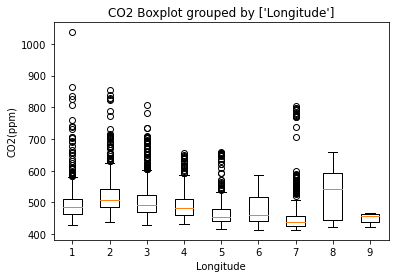

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

c = pd.read_csv("merge_process.csv")
c = c[c['LONGITUDE'].notnull()] #remove gps NaN
c = c[c.SPEED > 5] #remove below 5km/h

d  = pd.read_excel("turnel.xlsx")
d = d.loc[:,['터널시작점경도', '터널연장(경도)']]
d = d.T
d = d.to_numpy()

print(c.shape)

for i in range(72):
    turnel_s = c['LONGITUDE'] >= d[0][i] - 0.7*d[1][i]
    turnel_e= c['LONGITUDE'] <= d[0][i] + 0.7*d[1][i]
    c.loc[turnel_s & turnel_e ,'CO2'] = np.nan
    
nx=10
#n = np.linspace(127.1919,128.6022,nx)
n = np.linspace(126.64,128.6022,nx)
print(n)
print(c.isnull().sum())

co2 = []
for i in range(nx-1):
    x = (n[i] < c['LONGITUDE']) & (c['LONGITUDE'] < n[i+1] ) #CO2 as longitude interval
    co2.append(c.loc[x, 'CO2'])
    co2[i] = co2[i][co2[i].notnull()]
    print(np.mean(co2[i]), len(co2[i]))

plt.boxplot((co2[0],co2[1],co2[2],co2[3],co2[4],co2[5],co2[6],co2[7],co2[8])) #boxplot as Longitude
plt.xlabel("Longitude")
plt.ylabel("CO2(ppm)")
plt.title("CO2 Boxplot grouped by ['Longitude']")
plt.savefig("CO2_Longitude")
c

In [ ]:
c = pd.read_csv("merge_process.csv")
c.describe()['CO2']

count    11023.000000
mean       495.020354
std         64.724918
min        409.847000
25%        451.875000
50%        480.555000
75%        520.031000
max       1036.420000
Name: CO2, dtype: float64

In [ ]:
d = pd.read_csv("CO2_AMY_ULD.csv")
x = (d.DateTime < '2020-09-11 13:53')
d = d.loc[x]
print(d.describe())
print(c['CO2'].describe())
print(np.percentile(d.AMY, [1]), np.percentile(d.ULD, [1]), np.percentile(c.CO2, [1]))

              AMY         ULD
count  233.000000  233.000000
mean   430.123914  415.060429
std      5.098628    0.916654
min    421.568000  413.291000
25%    424.809000  414.406000
50%    432.206000  414.864000
75%    434.756000  415.643000
max    437.347000  417.618000
count    6172.000000
mean      495.002316
std        52.343829
min       413.503000
25%       459.865750
50%       485.756000
75%       518.359750
max      1036.420000
Name: CO2, dtype: float64
[422.13196] [413.4452] [419.80658]


(6473, 14)
493.989243996902 1291
521.604896713615 639
501.5209320518555 2237
490.90012681637967 757
477.4364247191011 445
478.3872139175257 388
464.4904352078239 409
539.6709558823533 204
479.1334563106797 103


'\nplt.text(0.15,410,"126.64", fontsize=8)\nplt.text(1.15,410,"126.86", fontsize=8)\nplt.text(2.15,410,"127.08", fontsize=8)\nplt.text(3.15,410,"127.29", fontsize=8)\nplt.text(4.15,410,"127.51", fontsize=8)\nplt.text(5.15,410,"127.73", fontsize=8)\nplt.text(6.15,410,"127.95", fontsize=8)\nplt.text(7.15,410,"128.17", fontsize=8)\nplt.text(8.15,410,"128.38", fontsize=8)\nplt.text(9.15,410,"128.60", fontsize=8)\n'

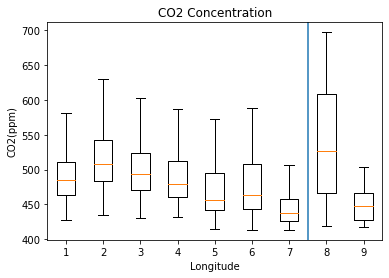

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

c = pd.read_csv("merge_process.csv")
c = c[c['LONGITUDE'].notnull()] #remove gps NaN
c = c[c.SPEED > 5] #remove below 5km/h

d  = pd.read_excel("turnel.xlsx")
d = d.loc[:,['터널시작점경도', '터널연장(경도)']]
d = d.T
d = d.to_numpy()

for i in range(72):
    turnel_s = c['LONGITUDE'] >= d[0][i] - 0.5*d[1][i]
    turnel_e= c['LONGITUDE'] <= d[0][i] + 0.5*d[1][i]
    #c.loc[turnel_s & turnel_e ,'CO2'] = np.nan
    c = c.drop(c.loc[turnel_s & turnel_e ,'CO2'].index)

print(c.shape)
nx=10
#n = np.linspace(127.2,128.6022,nx) suburban
n = np.linspace(126.64,128.6022,nx) #from seoul to sokcho
#n = np.linspace(126.64,128.166023,nx) #from seoul to before turnel

#print(n)
#print(c.isnull().sum())

co2 = []
for i in range(nx-1):
    x = (n[i] < c['LONGITUDE']) & (c['LONGITUDE'] < n[i+1] ) #CO2 as longitude interval
    co2.append(c.loc[x, 'CO2'])
    co2[i] = co2[i][co2[i].notnull()]
    print(np.mean(co2[i]), len(co2[i]))

plt.boxplot((co2[0],co2[1],co2[2],co2[3],co2[4],co2[5],co2[6],co2[7],co2[8]),0,'') #boxplot as Longitude
plt.xlabel("Longitude")
plt.ylabel("CO2(ppm)")
plt.title("CO2 Concentration")
plt.axvline(x=7.5)
plt.savefig("CO2_Longitude")

In [ ]:
c = pd.read_csv("merge.csv")
#x = (c['LONGITUDE'] > 128.6)
x = (c['LATITUDE']>38.065110)
y =  (c['LATITUDE']<38.154538)
c = c.loc[x&y]
np.median(c.CO2)
#412.4868, 422.1538
c = pd.read_csv("~/ML/CO2_AMY_ULD.csv")
np.percentile(c.AMY, [1])
#np.percentile(c.ULD, [1])

array([422.1538])

,DATE,TIME,CO2,CAVITY_P,CAVITY_T,INDEX,VALID,LATITUDE,LONGITUDE,ALTITUDE,SPEED,HEADING
13399,2020-09-11,14:31:44,462.031,40.4304,54.9987,11226.0,SPS,38.065197,128.600495,34.500000,85.766121,65.950219
13400,2020-09-11,14:31:45,461.716,40.4275,54.9987,11227.0,SPS,38.065283,128.600742,33.900002,84.747520,64.120653
13401,2020-09-11,14:31:46,462.043,40.4333,54.9987,11228.0,SPS,38.065375,128.600982,33.799999,81.432442,60.600805
13402,2020-09-11,14:31:47,463.344,40.4411,54.9987,11229.0,SPS,38.065473,128.601203,33.500000,77.395081,55.437097
13403,2020-09-11,14:31:48,464.384,40.4431,54.9987,11230.0,SPS,38.065580,128.601400,33.000000,74.209641,49.743001
...,...,...,...,...,...,...,...,...,...,...,...,...
19110,2020-09-11,16:06:55,527.745,57.8225,55.0005,16879.0,SPS,38.228628,128.487720,198.600006,0.000000,0.000000
19111,2020-09-11,16:06:56,336.351,68.6962,55.0016,16880.0,SPS,38.228628,128.487720,198.600006,0.000000,0.000000
19112,2020-09-11,16:06:57,336.046,70.6250,55.0026,16881.0,SPS,38.228628,128.487720,198.600006,0.000000,0.000000
19113,2020-09-11,16:06:58,1011.110,71.3759,55.0026,16882.0,SPS,38.228628,128.487720,198.600006,0.000000,0.000000


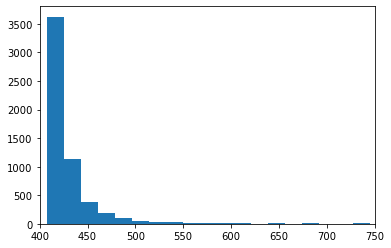

In [ ]:
plt.hist(c.CO2,bins=100)
plt.xlim([400,750])
c

LinregressResult(slope=-0.27411056658764005, intercept=510.5131901453412, rvalue=-0.19712683523015545, pvalue=4.0601359696139496e-55, stderr=0.01735525503380417)
LinregressResult(slope=0.008007699750511582, intercept=461.39811324759046, rvalue=0.1944777667890358, pvalue=1.1472847732041601e-53, stderr=0.0005141893074039876)


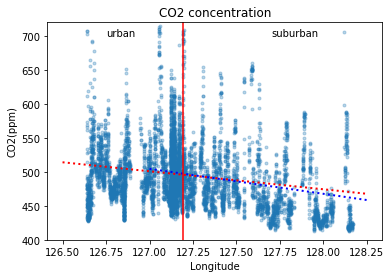

In [ ]:
from scipy.stats import linregress 

#z = c['LONGITUDE'] >= 128.581143
#print(np.mean(c.loc[z,'CO2']))
#d = c.loc[z]

#c = c[c['CO2'].notnull()]
x = (c['LONGITUDE'] < 128.17)
#y = (c['LONGITUDE'] > 127.194481)
c = c.loc[x]

londat = np.array(c.LONGITUDE)
latdat = np.array(c.LATITUDE)
disdat = (((londat - 126.64151799999999)*88.74)**2 + ((latdat - 37.368382000000004)*133.33)**2)**0.5
#disdat = (londat - 126.64151799999999)*88.74
trfdat = np.array(c.CarsNumber)
co2dat = np.array(c.CO2)

#np.nanmean(np.reshape(np.arange(100),(5,20)), axis = 1)
#smco2 = np.nanmean(np.reshape(co2dat[:7800], (780,10)),axis = 0)

print(linregress(disdat, co2dat))
print(linregress(trfdat, co2dat))

trflin = linregress(londat, co2dat)
#trflin = linregress(disdat, co2dat) 
#trflin = linregress(trfdat, co2dat) 

plt.scatter(londat, co2dat, marker ='.', alpha = 0.3)
#plt.scatter(trfdat, co2dat, marker ='.', alpha = 0.1)
#plt.figure(figsize = (16,4))
#plt.scatter(disdat, co2dat, marker ='.', alpha = 0.3)

xlin = np.linspace(126.5, 128.25, 100)
ylin = xlin * trflin[0]+ trflin[1]
plt.plot(xlin, ylin,linewidth='2',color='r',linestyle = ':')
xlin = np.linspace(127.0, 128.25, 100)
ylin =  -36.73 * xlin + 5169.13
plt.plot(xlin, ylin, linewidth='2',color='b',linestyle = ':')
'''
xlin = np.linspace(2000, 8000, 1000)
ylin = xlin * trflin[0]+ trflin[1]
plt.plot(xlin, ylin,linewidth='2',color='r',linestyle = ':')
'''
#plt.xlabel("The number of cars")
plt.xlabel("Longitude")
plt.ylabel("CO2(ppm)")
plt.title("CO2 concentration")
plt.ylim([400,720])
#plt.text(5000,680,"y = %.3f x + %.2f , p < 0.01" % (trflin[0],trflin[1]), fontsize=10)
#plt.text(65,680,"y = %.2f x + %.2f , p < 0.01" % (trflin[0],trflin[1]), fontsize=10)
#plt.text(127.5,440,"y = -36.73x + 5169.13, p < 0.01", fontsize=10,fontweight='bold')
#plt.text(127.5,500,"y = %.2fx + %.2f, p < 0.01" % (trflin[0],trflin[1]), fontsize=10,fontweight='bold')
plt.text(126.75,700,"urban", fontsize=10)
plt.text(127.7,700,"suburban" , fontsize=10)
plt.axvline(x=127.194481,color='r')
plt.savefig("CO2_Longitude_Regression")

494.16 469.13800000000003
              AMY         ULD
count  233.000000  233.000000
mean   430.123914  415.060429
std      5.098628    0.916654
min    421.568000  413.291000
25%    424.809000  414.406000
50%    432.206000  414.864000
75%    434.756000  415.643000
max    437.347000  417.618000
count    6172.000000
mean      495.002316
std        52.343829
min       413.503000
25%       459.865750
50%       485.756000
75%       518.359750
max      1036.420000
Name: CO2, dtype: float64
[422.13196] [413.4452] [419.80658]


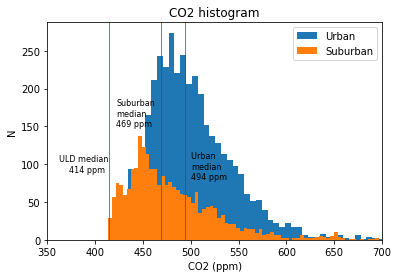

In [ ]:
x = (c['LONGITUDE'] < 128.17)
c = c.loc[x]

x = (c['LONGITUDE'] < 127.194481)
d = c.loc[x]
x = (c['LONGITUDE'] > 127.194481)
e = c.loc[x]
print(np.median(d.CO2), np.median(e.CO2))

plt.hist(d.CO2, bins=100, label='Urban', alpha=1)
plt.hist(e.CO2, bins=100, label = 'Suburban',alpha=1)
plt.legend()
plt.axvline(x=np.median(d.CO2),color='r', linewidth = 0.7)
plt.axvline(x=np.median(e.CO2),color='r', linewidth = 0.7)

plt.text(500,80,"Urban \nmedian\n%d ppm" % (np.median(d.CO2)), fontsize=8)
plt.text(422,150,"Suburban\nmedian\n%d ppm" % (np.median(e.CO2)), fontsize=8)
#plt.text(127.63,430,"y = %.2fx + %.2f, p < 0.01" % (trflin[0],trflin[1]), fontsize=10)
plt.xlim([350,700])
plt.xlabel("CO2 (ppm)")
plt.ylabel("N")
plt.title("CO2 histogram")


d = pd.read_csv("CO2_AMY_ULD.csv")
x = (d.DateTime < '2020-09-11 13:53')
d = d.loc[x]
print(d.describe())
print(c['CO2'].describe())
print(np.percentile(d.AMY, [1]), np.percentile(d.ULD, [1]), np.percentile(c.CO2, [1]))
#plt.axvline(x=np.percentile(d.AMY, [50]),color='r', linewidth = 0.7)
plt.axvline(x= np.percentile(d.ULD, [50]),color='r', linewidth = 0.7)
#plt.text(380,100,"AMD median\n     %d ppm" % (np.percentile(d.AMY, [50])), fontsize=8)
plt.text(362,90,"ULD median\n    %d ppm" % (np.percentile(d.ULD, [50])), fontsize=8)
plt.savefig("CO2 histogram")

In [ ]:
f = pd.read_csv("CO2_AMY_ULD.csv")
f
c

,DATE,TIME,CO2,CAVITY_P,CAVITY_T,INDEX,VALID,LATITUDE,LONGITUDE,ALTITUDE,SPEED,HEADING,CarsNumber,Flag
299,2020-09-11,10:37:33,432.877,40.0289,55.0010,300.0,SPS,37.394600,126.641518,-29.900000,6.093080,131.069086,4797,NaN
300,2020-09-11,10:37:34,430.020,40.0277,55.0010,301.0,SPS,37.394585,126.641540,0.000000,8.556240,122.184199,4797,NaN
301,2020-09-11,10:37:35,441.870,40.0281,55.0010,302.0,SPS,37.394572,126.641567,0.200000,9.463720,116.221788,4797,NaN
302,2020-09-11,10:37:36,481.482,40.0281,55.0010,303.0,SPS,37.394557,126.641605,0.700000,11.019400,115.521510,4797,NaN
303,2020-09-11,10:37:37,489.612,40.0289,55.0010,304.0,SPS,37.394538,126.641653,1.800000,12.871400,124.471994,4797,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9209,2020-09-11,13:53:07,423.521,40.3960,55.0003,10472.0,SPS,37.797015,128.166578,375.799988,89.173798,90.434093,2296,NaN
9210,2020-09-11,13:53:08,425.246,40.3968,55.0003,10473.0,SPS,37.797013,128.166857,376.299988,88.988602,90.863053,2296,NaN
9211,2020-09-11,13:53:09,426.583,40.4046,55.0003,10474.0,SPS,37.797010,128.167137,376.700012,89.118240,90.434093,2296,NaN
9220,2020-09-11,13:53:18,423.136,40.3951,55.0003,10483.0,Estimated (dead reckoning),37.796987,128.169667,380.799988,91.081360,89.999912,2296,NaN


TypeError: 'Text' object is not callable

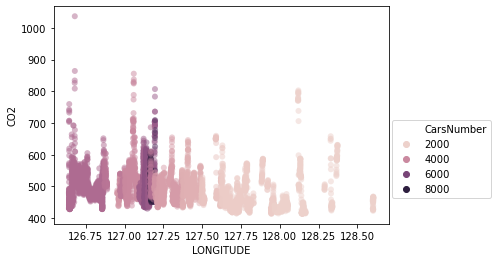

In [ ]:
ax = sns.scatterplot(x=c.LONGITUDE, y=c.CO2, hue=c.CarsNumber, edgecolor = 'None', alpha =0.5)
ax.legend(loc='upper right', bbox_to_anchor=(1.32, 0.5), ncol=1)
#ax.savefig("CO2 with longitude and Cars")
ax.title("CO2 with longitude and Cars")